In [1]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

In [2]:
!python3 -m spacy download en_core_web_lg

2022-10-14 06:52:44.215423: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 9.5 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [3]:
nlp = spacy.load('en_core_web_lg')

In [4]:
%pip install PyPDF2
import PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
%pip install lexical-diversity
from lexical_diversity import lex_div as ld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
with open('Quran-English.pdf', 'rb') as file:
    reader = PyPDF2.PdfFileReader(file)
    num = reader.getNumPages()
    print(f"Number of {num} pages found!")

    whole_text = ""
    for i in range(num):
        whole_text += reader.getPage(i).extract_text()
        print(f'\rPage {i + 1} is read!', end='')

Number of 712 pages found!
Page 712 is read!

## Function
This function will be used through out the whole notebook

In [7]:
def token_frequency(txt, not_include=[], only_include=[], verbos=False):
    if len(not_include) != 0 and len(only_include) != 0: 
        raise Exception('Cannot specify both "not_include" and "only_include"')
    words = dict()
    doc = nlp(txt)
    for token in doc:
        if token.pos_ in not_include: continue
        if len(only_include) != 0 and token.pos_ not in only_include: continue
        if nlp.vocab[token.lemma_].is_stop: continue
        if token.lemma_ not in words.keys():
            words[token.lemma_] = 1
        else: words[token.lemma_] += 1
        if verbos: print(f"{token.text:{16}} {token.pos_:{12}} {token.dep_:{12}} {token.lemma_:{16}} {spacy.explain(token.tag_)}")
    
    words = dict(sorted(words.items(), key=lambda item: item[1], reverse=True))
    return words

## Quran

In [13]:
words = token_frequency(whole_text[:1000000], not_include=['SPACE', 'PUNCT', 'NUM', 'SYM', 'X', 'PROPN'], verbos=False)

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud

In [15]:
words.pop('.')
words.pop('o')
df = pd.DataFrame({'word':words.keys(), 'frequency':words.values()})
df.head(30)

,word,frequency
0,people,713
1,believe,504
2,know,445
3,come,432
4,good,404
5,allœh,387
6,earth,372
7,send,333
8,punishment,333
9,fear,319


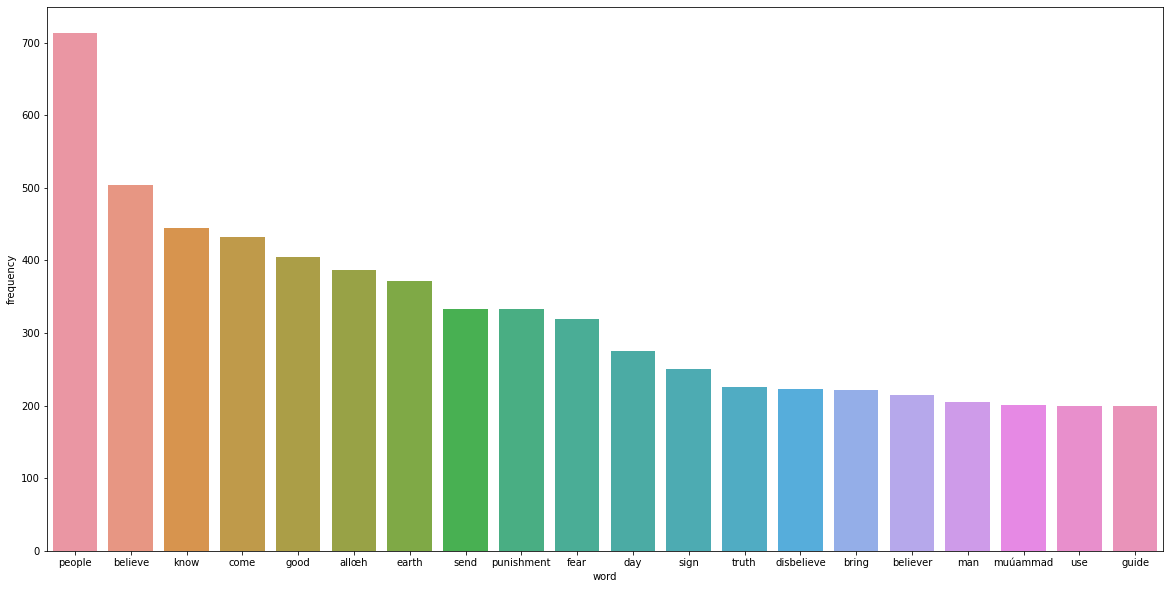

In [16]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df.iloc[:20], x='word', y='frequency');

In [20]:
wordcloud = WordCloud(width=1200, height=800, background_color='#FFFFFF').generate_from_frequencies(words)

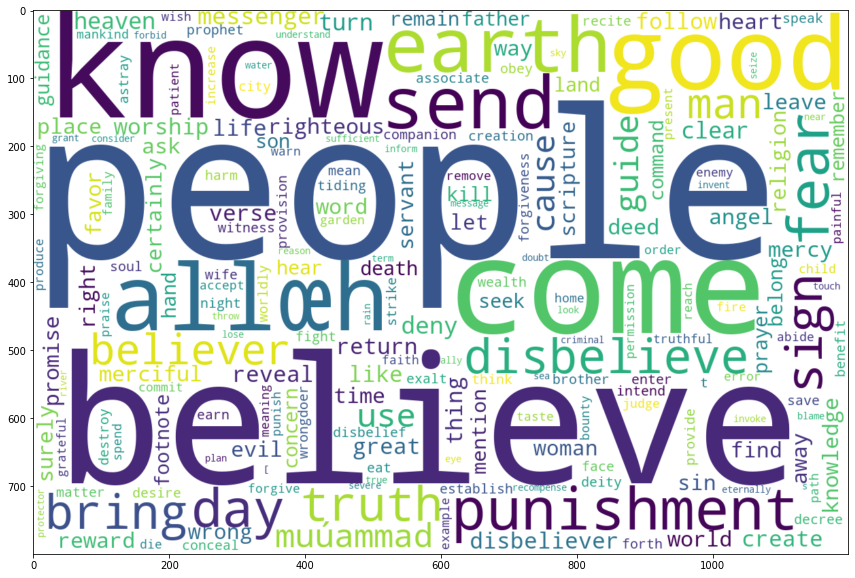

In [21]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')

In [22]:
verbs = token_frequency(whole_text[:1000000], only_include=['VERB'], verbos=False)

In [23]:
verbs_df = pd.DataFrame({'word':verbs.keys(), 'frequency':verbs.values()})
verbs_df.head(20)

,word,frequency
0,believe,504
1,know,443
2,come,432
3,send,333
4,fear,263
5,disbelieve,223
6,bring,221
7,deny,197
8,use,193
9,turn,185


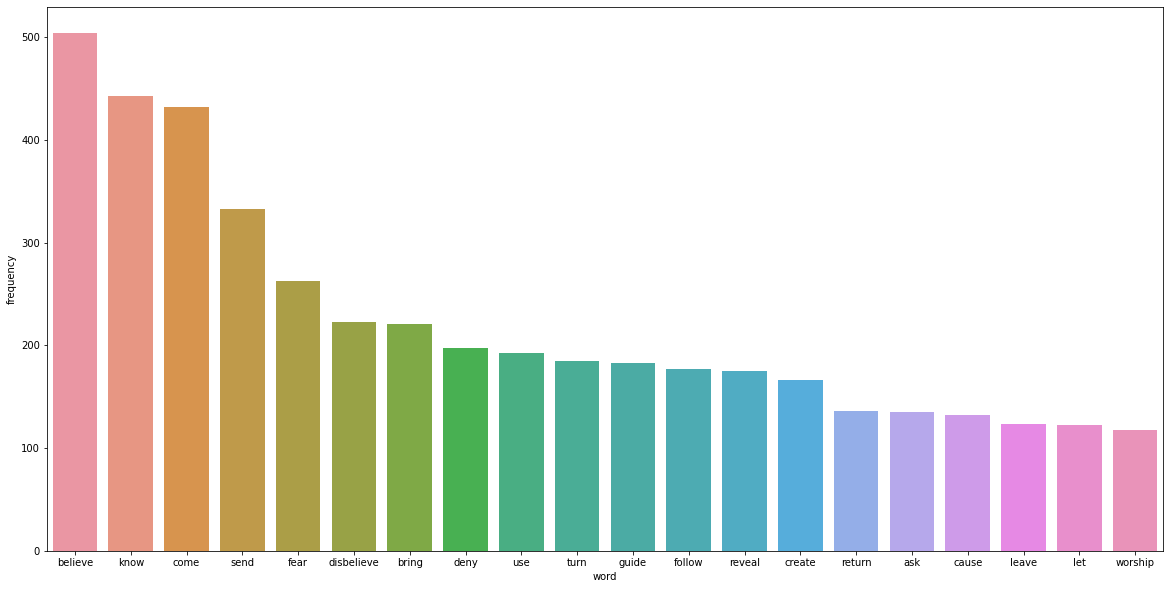

In [24]:
plt.figure(figsize=(20, 10))
sns.barplot(data=verbs_df.iloc[:20], x='word', y='frequency');

In [25]:
wordcloud = WordCloud(width=1200, height=800, background_color='#FFFFFF').generate_from_frequencies(verbs)

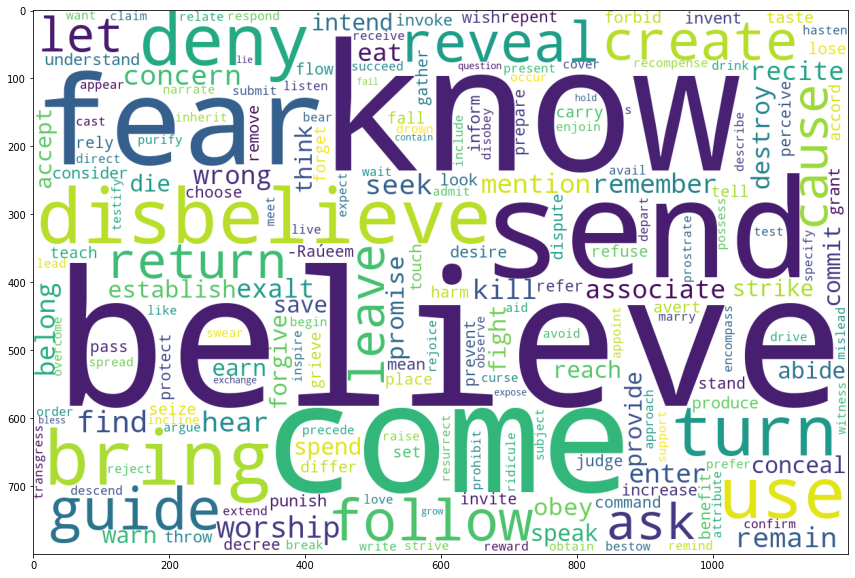

In [26]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud);

## Calculating Lexical diversity score

In [ ]:
lemmas = []
for token in nlp(whole_text[:1000000]):
    if token.pos_ in ['PUNCT', 'NUM', 'SPACE', 'X', 'PROPN', 'SYM']: continue
    if token.is_stop: continue
    lemmas.append(token.lemma_)

lemmas[:100]

In [30]:
ld.ttr(lemmas)

0.1378655679431249

In [29]:
ld.msttr(lemmas, window_length=250)

0.7284444444444444

In [31]:
print(f'The size of tokens is {len(lemmas)}')

The size of tokens is 49512
